# Image Seam Carving with `seam_carve`

This section demonstrates how to use the `seam_carve` function to implement content-aware image reduction. The `seam_carve` function resizes an image to target dimensions by removing low-energy seams (paths of least importance).

This guide will demonstrate the usage and functionality of the `seam_carve` function through a series of practical examples.

## Importing Necessary Libraries

First, we will need to import the necessary libraries and load a grayscale and color (RGB) image to manipulate. We will use [`matplotlib`](https://matplotlib.org/stable/api/pyplot_summary.html) to display images and [`numpy`](https://numpy.org/) for array manipulations.

> **Note:** To maintain a clean demonstration, we'll suppress any `UserWarning` that may appear in the tutorial.

In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from skimage import data
from sharpedge.seam_carving import seam_carve

# Suppress warnings to ensure cleaner output
warnings.filterwarnings("ignore")

## Preparing Your Image

We'll define the sample images from [`scikit-image` library](https://scikit-image.org/docs/stable/api/skimage.html). The image used is the [`rocket` image](https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.rocket).

### Example: RGB Rocket Image

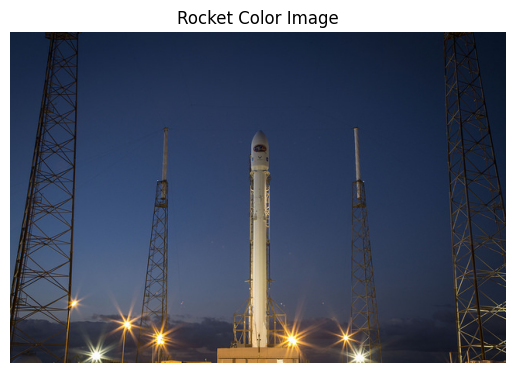

In [2]:
# Load the rocket color image from scikit-image
img = data.rocket()

# Display the image
plt.imshow(img)
plt.title("Rocket Color Image")
plt.axis('off') 
plt.show()

In [3]:
# Display shape and exact numpy array
print(f'Rocket color image in 3D: {np.shape(img)}')
print(img)

Rocket color image in 3D: (427, 640, 3)
[[[ 17  33  58]
  [ 17  33  58]
  [ 17  33  59]
  ...
  [  8  19  37]
  [  8  19  37]
  [  7  18  36]]

 [[ 17  33  58]
  [ 17  33  58]
  [ 17  33  59]
  ...
  [  8  19  37]
  [  8  19  37]
  [  8  19  37]]

 [[ 18  34  59]
  [ 18  34  59]
  [ 18  34  60]
  ...
  [  8  19  37]
  [  8  19  37]
  [  8  19  37]]

 ...

 [[ 27  28  32]
  [ 29  29  37]
  [ 20  24  36]
  ...
  [136 106  82]
  [186 136  85]
  [173 119  81]]

 [[ 26  27  31]
  [ 29  32  39]
  [ 30  34  46]
  ...
  [103  67  45]
  [ 97  61  27]
  [ 76  49  20]]

 [[ 26  27  31]
  [ 29  32  39]
  [ 40  46  60]
  ...
  [ 82  53  37]
  [ 79  50  32]
  [ 83  61  37]]]


## Applying the `seam_carve` function

We can now apply the `seam_carve` function to resize our image to a smaller dimensions. You can customize the desired height and width of the target image by assigning the `target_height` and `target_width`.

> **Note:** Both `target_height` and `target_width` should be no greater than the height and width of the original image. 
> 
> If you're unsure about the original dimensions, you can check them using `np.shape(YOUR_IMAGE)[:2]` or run the code below:

In [4]:
# Get the original dimensions of the image
original_height, original_width = img.shape[:2]

print(f"Original Dimensions: {original_height} x {original_width} (Height x Width)")

Original Dimensions: 427 x 640 (Height x Width)


### Reduce the Height of the Image

Let's reduce only the height of the image by setting `target_height` to `350` while keeping the `target_width` unchanged at its original value of `640`. 

> **Note:** You should encounter a **UserWarning** stating, "*Target width is the same as the original width*". This is expected and indicates that no width adjustment will be made during the process. In our tutorial, however, the warning is suppressed to improve clarity in the demonstration.

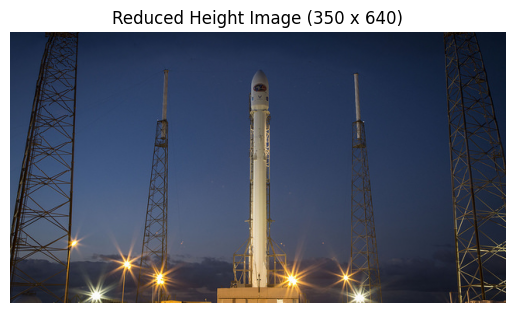

Original Dimensions: (427, 640) (Height x Width)
Resized Dimensions: (350, 640) (Height x Width)


In [5]:
import warnings
warnings.filterwarnings('ignore')

# Apply seam carving to reduce the image.
# Target dimensions:
# - Height: 350 pixels.
# - Width: 640 pixels (same as original width, no change).
reduced_height_img = seam_carve(
    img=img, 
    target_height=350, 
    target_width=640
)

# Display the reduced image
plt.imshow(reduced_height_img)
plt.title('Reduced Height Image (350 x 640)')
plt.axis('off')
plt.show()

# Check the dimensions of the original and resized images
print(f'Original Dimensions: {img.shape[:2]} (Height x Width)')
print(f'Resized Dimensions: {reduced_height_img.shape[:2]} (Height x Width)')

### Reduce the Width of the Image

Let's try recuding the width only this time by setting `target_width` to `500` while keeping the `target_height` unchanged at its original value of `427`. 

> **Note:** Similarly, you should receive a **UserWarning** stating, "*Target width is the same as the original width*". This is expected and indicates that no width adjustment will be made during the process. In our tutorial, however, the warning is suppressed to improve clarity in the demonstration.

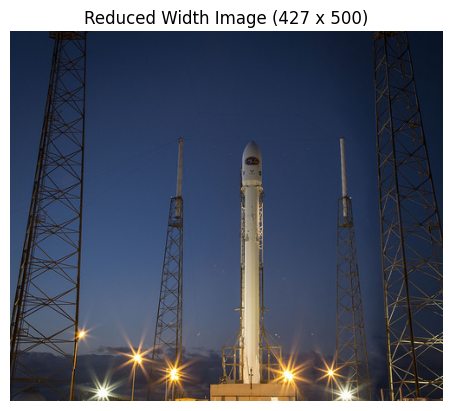

Original Dimensions: (427, 640) (Height x Width)
Resized Dimensions: (427, 500) (Height x Width)


In [6]:
# Apply seam carving to reduce the image.
# Target dimensions:
# - Height: 427 pixels (same as original width, no change).
# - Width: 500 pixels.
reduced_width_img = seam_carve(img=img, target_height=427, target_width=500)

# Display the reduced image
plt.imshow(reduced_width_img)
plt.title('Reduced Width Image (427 x 500)')
plt.axis('off')
plt.show()

# Check the dimensions of the original and resized images
print(f'Original Dimensions: {img.shape[:2]} (Height x Width)')
print(f'Resized Dimensions: {reduced_width_img.shape[:2]} (Height x Width)')

### Resize Both the Height and Width of the Image

In this example, we will resize both the height and the width of the image, both `target_height` and `target_width` setting to `400`.

> **Note:** Resizing both dimensions may take longer than resizing only one due to the additional computation required. Grab a coffee while you wait!

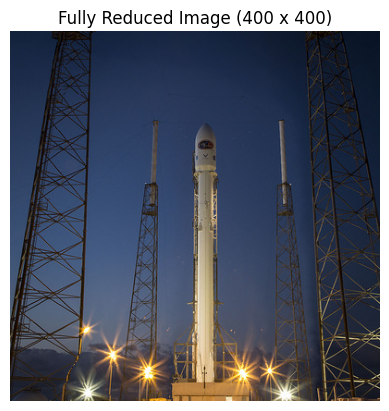

Original Dimensions: (427, 640) (Height x Width)
Resized Dimensions: (400, 400) (Height x Width)


In [7]:
# Apply seam carving to resize the image.
# Target dimensions:
# - Height: 400 pixels.
# - Width: 400 pixels.
fully_reduced_img = seam_carve(img=img, target_height=400, target_width=400)

# Display the resized image
plt.imshow(fully_reduced_img)
plt.title('Fully Reduced Image (400 x 400)')
plt.axis('off')
plt.show()

# Check the dimensions of the original and resized images
print(f'Original Dimensions: {img.shape[:2]} (Height x Width)')
print(f'Resized Dimensions: {fully_reduced_img.shape[:2]} (Height x Width)')

Congratulations! You have successfully learnt how to use the `seam_carve` function to reduce images in a content-aware manner. Feel free to try your own images to explore the potential of seam carving!